Teacher Retirement Prediction and Demographic Analysis Report

Descriptive Statistics for the Entire Dataset:
              Age  Years_of_service  Will_Retire
count  200.000000        200.000000   200.000000
mean    49.070000         20.440000     0.320000
std     10.316845         11.608626     0.467647
min     30.000000          1.000000     0.000000
25%     41.000000         10.000000     0.000000
50%     51.000000         20.000000     0.000000
75%     58.000000         30.250000     1.000000
max     64.000000         39.000000     1.000000

Descriptive Statistics by Province:
                Age                                                        \
              count       mean        std   min    25%   50%    75%   max   
Province                                                                    
Gauteng        46.0  48.065217  10.731888  30.0  37.25  51.0  57.75  64.0   
KwaZulu-Natal  54.0  48.333333  10.173959  30.0  41.00  48.0  57.00  64.0   
Limpopo        46.0  49.391304  10.188181  30.0  41.00  51.5  57.75  64.0   
Western Cape 

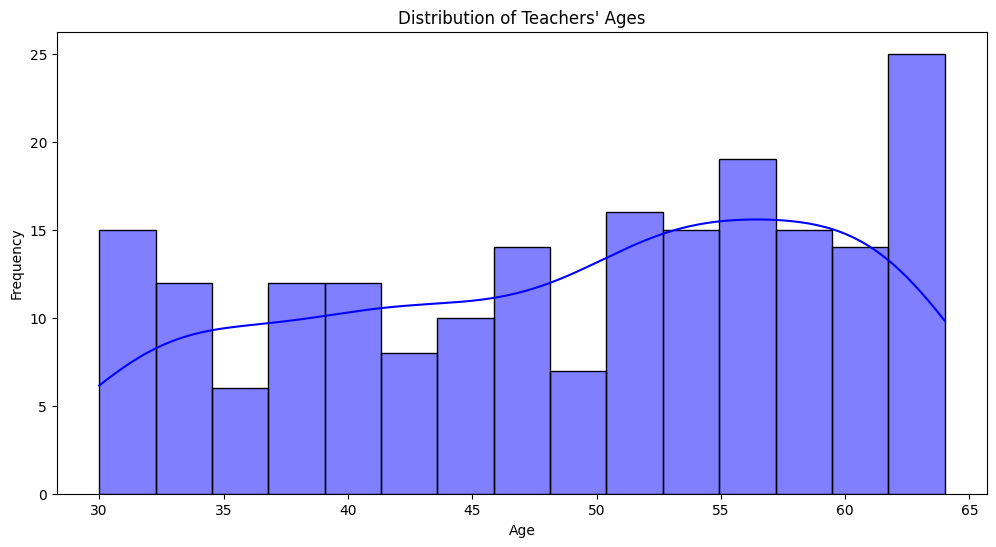

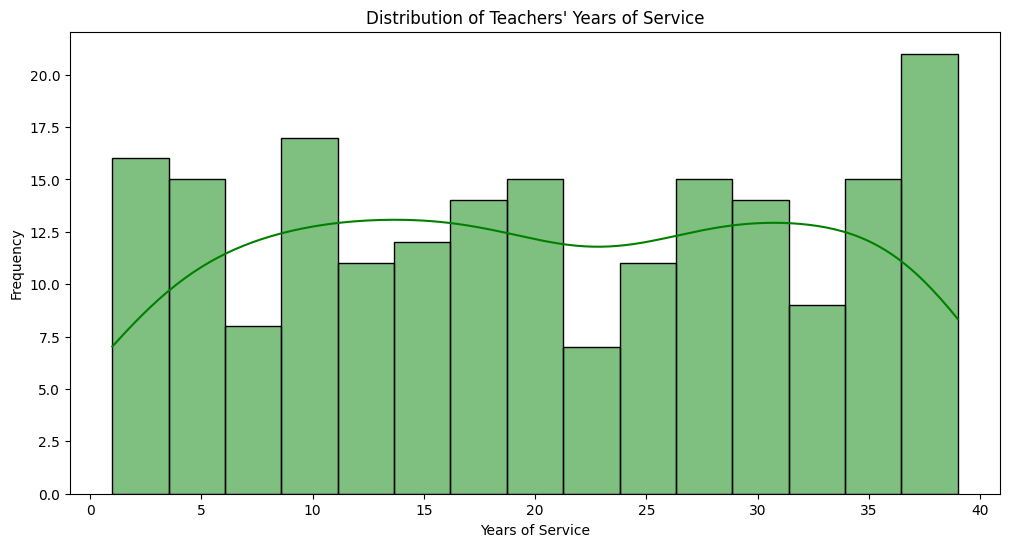

C:\Users\KatlegoRamahala\AppData\Local\Temp\ipykernel_9756\330954647.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Province', y='Age', data=df, palette='coolwarm')


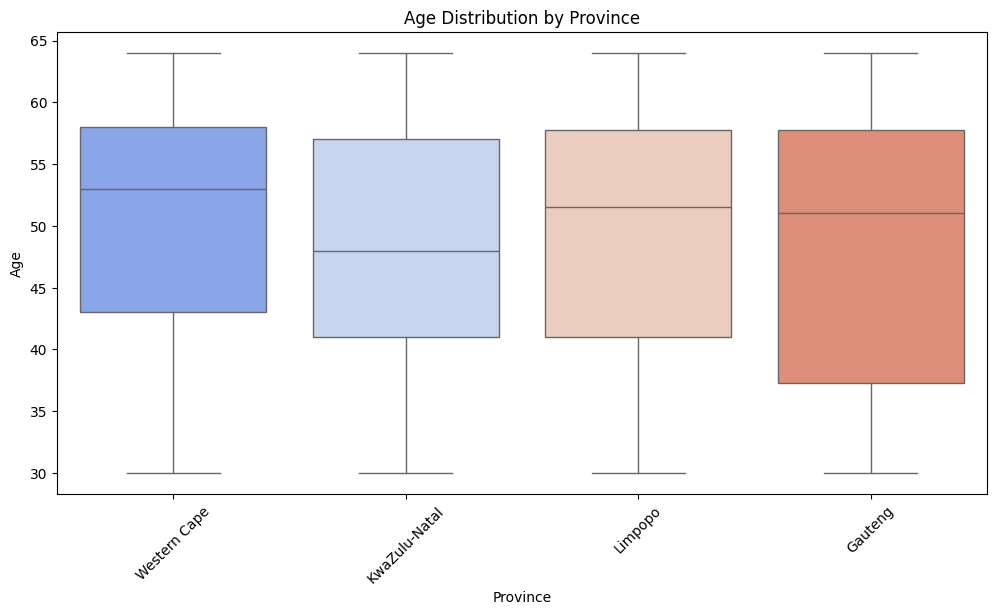

C:\Users\KatlegoRamahala\AppData\Local\Temp\ipykernel_9756\330954647.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Province', y='Years_of_service', data=df, palette='coolwarm')


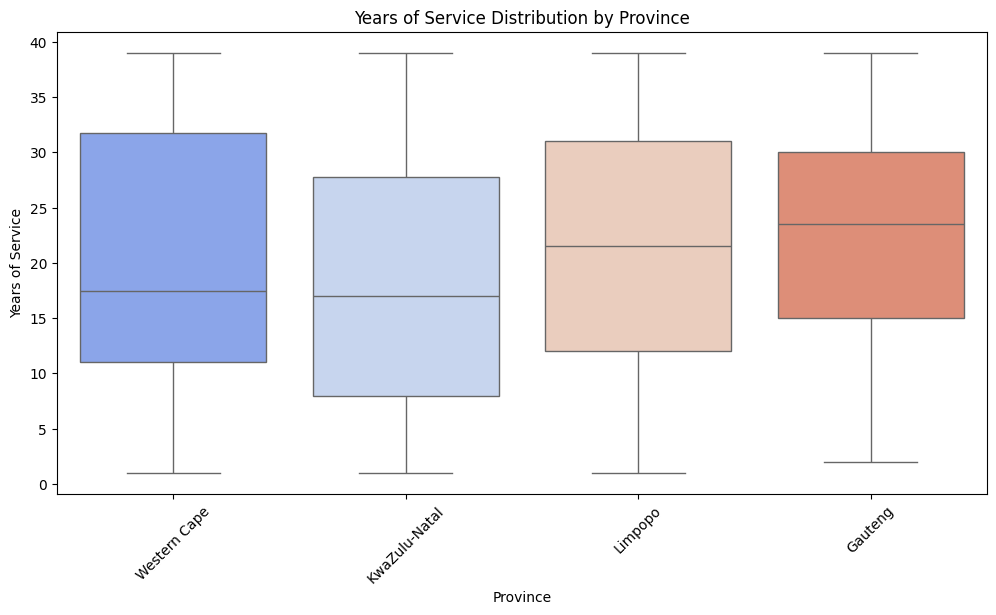

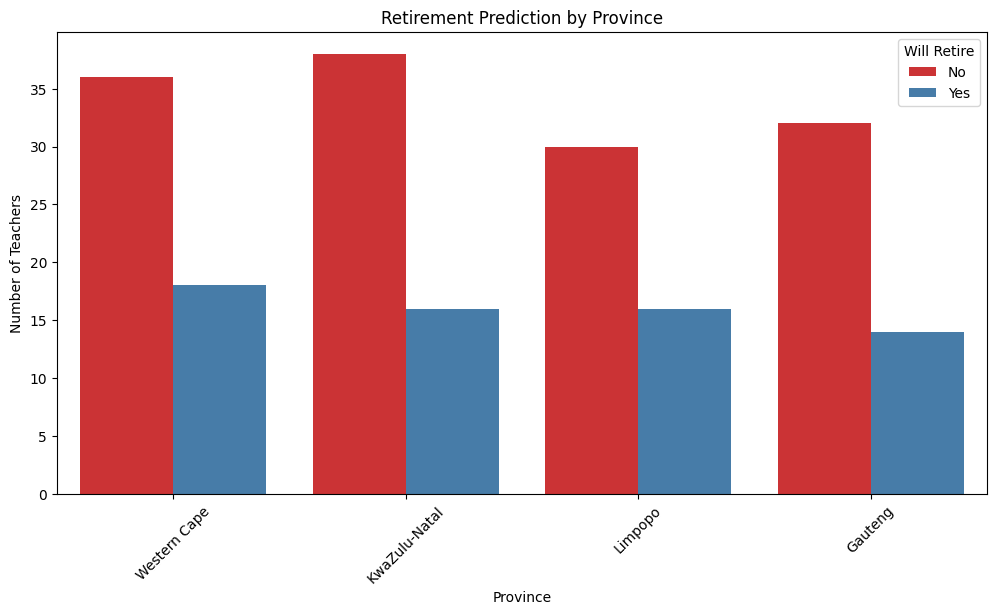

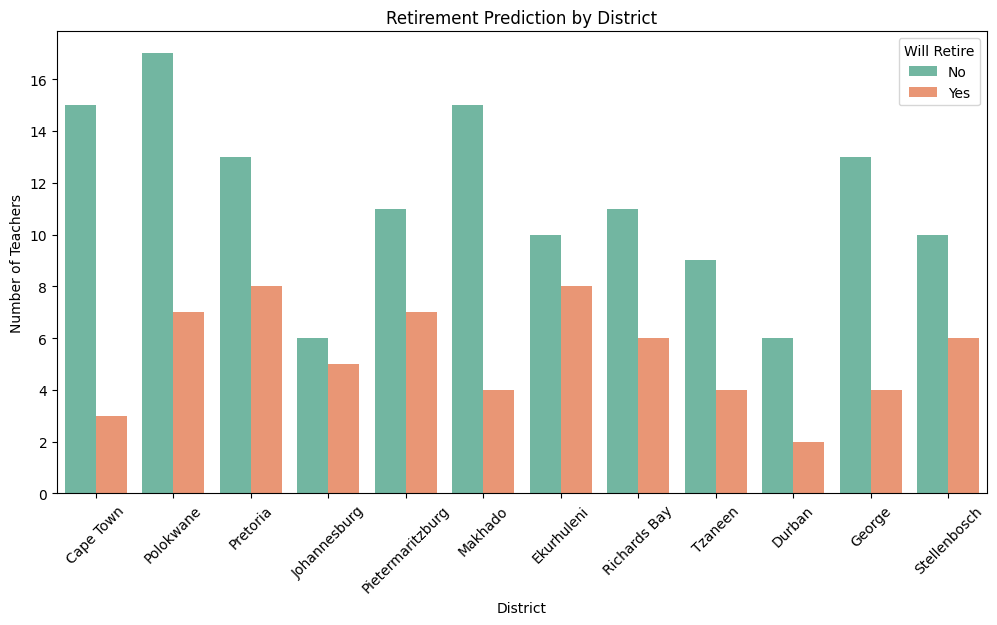


-------------------------------
### Retirement Prediction Report
-------------------------------

#### Objectives:
- To predict which teachers will retire in the next 5 years based on their age and years of service.
- To analyze teacher demographics by Province and District to understand trends in retirement across the regions.
- To provide a statistical and visual understanding of the teacher retirement distribution.

#### Descriptive Statistics:

1. **Overall Data Statistics**:
   - **Age**: 
      - Mean: 49.07
      - Standard Deviation: 10.32
      - Min: 30.00
      - Max: 64.00
   - **Years of Service**:
      - Mean: 20.44
      - Standard Deviation: 11.61
      - Min: 1.00
      - Max: 39.00

2. **Retirement Prediction**:
   - **Will Retire** (0: Not Retiring, 1: Retiring):
      - Count of teachers predicted to retire: 64
      - Count of teachers not predicted to retire: 136

#### Grouped Statistics:

- **By Province**: The descriptive statistics for `Age` and `Years_of_ser

In [1]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# 1. hierarchical dummy data

# Provinces and districts (example)
provinces = ['Limpopo', 'Gauteng', 'Western Cape', 'KwaZulu-Natal']
districts = {
    'Limpopo': ['Polokwane', 'Tzaneen', 'Makhado'],
    'Gauteng': ['Pretoria', 'Johannesburg', 'Ekurhuleni'],
    'Western Cape': ['Cape Town', 'Stellenbosch', 'George'],
    'KwaZulu-Natal': ['Durban', 'Pietermaritzburg', 'Richards Bay']
}

# Generate dummy teachers data with hierarchical info
np.random.seed(42)
num_teachers = 200

# Randomly assign teachers to provinces, districts, and schools
data = {
    'Province': np.random.choice(provinces, num_teachers),
    'District': np.random.choice(
        [district for districts_list in districts.values() for district in districts_list], num_teachers
    ),
    'School': [f"School_{i}" for i in range(num_teachers)],
    'Age': np.random.randint(30, 65, num_teachers),
    'Years_of_service': np.random.randint(1, 40, num_teachers)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Generate 'Will_Retire' based on age and years of service
df['Will_Retire'] = np.where((df['Age'] >= 60) | (df['Years_of_service'] >= 35), 1, 0)

# 2. Descriptive statistics for the full dataset
desc_stats = df[['Age', 'Years_of_service', 'Will_Retire']].describe()
print("Descriptive Statistics for the Entire Dataset:")
print(desc_stats)

# 3. Grouped Descriptive Statistics by Province and District
grouped_by_province = df.groupby('Province')[['Age', 'Years_of_service', 'Will_Retire']].describe()
grouped_by_district = df.groupby('District')[['Age', 'Years_of_service', 'Will_Retire']].describe()

print("\nDescriptive Statistics by Province:")
print(grouped_by_province)

print("\nDescriptive Statistics by District:")
print(grouped_by_district)

# 4. Visualization of descriptive statistics

# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=15)
plt.title('Distribution of Teachers\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Years of Service
plt.figure(figsize=(12, 6))
sns.histplot(df['Years_of_service'], kde=True, color='green', bins=15)
plt.title('Distribution of Teachers\' Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Age by Province
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Years of Service by Province
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='Years_of_service', data=df, palette='coolwarm')
plt.title('Years of Service Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Years of Service')
plt.xticks(rotation=45)
plt.show()

# Count plot for Will_Retire by Province
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', hue='Will_Retire', data=df, palette='Set1')
plt.title('Retirement Prediction by Province')
plt.xlabel('Province')
plt.ylabel('Number of Teachers')
plt.xticks(rotation=45)
plt.legend(title='Will Retire', labels=['No', 'Yes'])
plt.show()

# Count plot for Will_Retire by District
plt.figure(figsize=(12, 6))
sns.countplot(x='District', hue='Will_Retire', data=df, palette='Set2')
plt.title('Retirement Prediction by District')
plt.xlabel('District')
plt.ylabel('Number of Teachers')
plt.xticks(rotation=45)
plt.legend(title='Will Retire', labels=['No', 'Yes'])
plt.show()

# 5. Generate a report summary

report = f"""
-------------------------------
### Retirement Prediction Report
-------------------------------

#### Objectives:
- To predict which teachers will retire in the next 5 years based on their age and years of service.
- To analyze teacher demographics by Province and District to understand trends in retirement across the regions.
- To provide a statistical and visual understanding of the teacher retirement distribution.

#### Descriptive Statistics:

1. **Overall Data Statistics**:
   - **Age**: 
      - Mean: {desc_stats.loc['mean', 'Age']:.2f}
      - Standard Deviation: {desc_stats.loc['std', 'Age']:.2f}
      - Min: {desc_stats.loc['min', 'Age']:.2f}
      - Max: {desc_stats.loc['max', 'Age']:.2f}
   - **Years of Service**:
      - Mean: {desc_stats.loc['mean', 'Years_of_service']:.2f}
      - Standard Deviation: {desc_stats.loc['std', 'Years_of_service']:.2f}
      - Min: {desc_stats.loc['min', 'Years_of_service']:.2f}
      - Max: {desc_stats.loc['max', 'Years_of_service']:.2f}

2. **Retirement Prediction**:
   - **Will Retire** (0: Not Retiring, 1: Retiring):
      - Count of teachers predicted to retire: {df['Will_Retire'].sum()}
      - Count of teachers not predicted to retire: {df['Will_Retire'].count() - df['Will_Retire'].sum()}

#### Grouped Statistics:

- **By Province**: The descriptive statistics for `Age` and `Years_of_service` are provided for each province to understand regional differences.
- **By District**: The statistics are also provided for each district, showing the demographic makeup of teachers at a more granular level.

#### Conclusion:

- The data indicates that a significant portion of teachers across provinces and districts are approaching retirement age (60+) or have over 35 years of service.
- Regional trends in retirement were observed, with some provinces showing a higher concentration of teachers nearing retirement compared to others.
- The analysis suggests that targeted programs for retirement planning and succession are needed, especially in provinces with higher numbers of retiring teachers.
"""

# Print the report
print(report)
